In [2]:
import os, glob, sys, io
from pathlib import Path

from pprint import pprint
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import scipy
import scipy.signal
import scipy.interpolate
import cupy as cp

import ismrmrd
import ismrmrd.xsd

from tqdm.auto import tqdm, trange


from IPython.core.display import display, HTML

In [66]:
out_dir = "F:/MohammadRaziei/project/Dataset/ismrmrd_to_npz"
filenames = glob.glob(out_dir+"/*.npz")
len(filenames)

50

In [67]:
uuid = Path(filenames[0]).stem
source = np.load(filenames[0], allow_pickle=True)
kspace = source['kspace']
info = source['info'].item()
lNx,lNy,lNz = info['lNx'],info['lNy'],info['lNz']
kspace.shape

(1, 1, 37, 15, 1, 387, 320)

In [68]:
pd.DataFrame.from_dict(info, orient='index').T

,lNx,lNy,lNz,eNx,eNy,eNz,rNx,rNy,rNz,eFOVx,eFOVy,eFOVz,rFOVx,rFOVy,rFOVz,ncoils,nslices,nreps,ncontrasts
0,320.0,387.0,1.0,640.0,484.0,1.0,320.0,320.0,1.0,280.0,211.679993,4.5,140.0,140.0,3.0,15.0,37.0,1.0,1.0


In [69]:
all_info = [np.load(fname, allow_pickle=True)['info'].item() for fname in filenames]

In [70]:
pd.DataFrame(all_info)

,lNx,lNy,lNz,eNx,eNy,eNz,rNx,rNy,rNz,eFOVx,eFOVy,eFOVz,rFOVx,rFOVy,rFOVz,ncoils,nslices,nreps,ncontrasts
0,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,37,1,1
1,384,616,1,768,770,1,384,384,1,280.0,280.700012,4.5,140.0,140.0,3.0,15,31,1,1
2,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,38,1,1
3,320,517,1,640,646,1,320,320,1,280.0,282.799988,4.5,140.0,140.0,3.0,15,33,1,1
4,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,40,1,1
5,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,38,1,1
6,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,38,1,1
7,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,36,1,1
8,384,616,1,768,770,1,384,384,1,280.0,280.700012,4.5,140.0,140.0,3.0,15,34,1,1
9,320,387,1,640,484,1,320,320,1,280.0,211.679993,4.5,140.0,140.0,3.0,15,39,1,1


In [43]:
data_orig = np.squeeze(kspace)

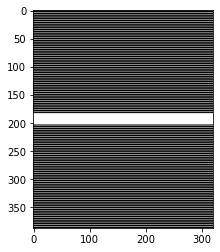

In [77]:
mask_k = np.zeros((lNy, lNx))
mask_k[::4,:] = 1

w = 10;
mask_w = np.zeros((lNy, lNx))
mask_w[lNy//2-w:lNy//2+w,:] = 1

mask_t = np.logical_or(mask_k, mask_w)

plt.imshow(mask_t, cmap='gray')#,interpolation='none')
plt.show()